In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

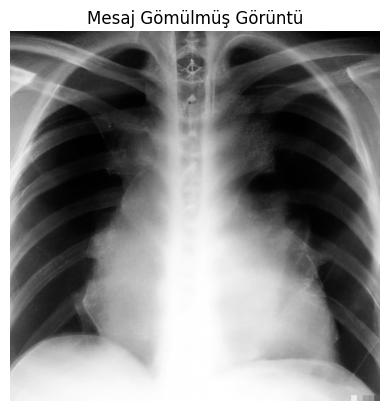

Gizlenmiş mesaj: k
Çıkarılan mesaj: k


In [5]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def embed_mask_filter(image, message):
    img_gray = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)

    # Kenar tespiti (Sobel)
    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
    edges = cv2.magnitude(sobelx, sobely).astype(np.uint8)

    _, mask = cv2.threshold(edges, 50, 1, cv2.THRESH_BINARY)

    binary_message = ''.join(format(ord(c), '08b') for c in message)
    flat_img = img_gray.flatten()
    mask_flat = mask.flatten()

    msg_index = 0
    for i in range(len(flat_img)):
        if mask_flat[i] == 1 and msg_index < len(binary_message):
            flat_img[i] = (flat_img[i] & ~1) | int(binary_message[msg_index])
            msg_index += 1

    new_img = flat_img.reshape(img_gray.shape)
    return Image.fromarray(new_img)

def extract_mask_filter(image, bit_count=8):
    img_gray = np.array(image)

    # Aynı şekilde kenar tespiti
    sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)
    edges = cv2.magnitude(sobelx, sobely).astype(np.uint8)

    _, mask = cv2.threshold(edges, 50, 1, cv2.THRESH_BINARY)

    flat_img = img_gray.flatten()
    mask_flat = mask.flatten()

    extracted_bits = ""
    for i in range(len(flat_img)):
        if mask_flat[i] == 1:
            extracted_bits += str(flat_img[i] & 1)
            if len(extracted_bits) >= bit_count:
                break

    chars = [chr(int(extracted_bits[i:i+8], 2)) for i in range(0, bit_count, 8)]
    return ''.join(chars)

# Resmi yükle
image_path = "/kaggle/input/awesomelungs/XRay/DALLE 2022-09-28 20.09.24 - lungs x-ray image.png"
image = Image.open(image_path).convert("RGB")
message = "k"

#  Mesajı göm
stego_image = embed_mask_filter(image, message)

# Göster
plt.imshow(stego_image, cmap='gray')
plt.axis('off')
plt.title("Mesaj Gömülmüş Görüntü")
plt.show()

#  Mesajı çıkar
extracted = extract_mask_filter(stego_image)
print("Gizlenmiş mesaj:", message)
print("Çıkarılan mesaj:", extracted)
